In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [107]:
data = pd.read_excel("Data_demo.xlsx")

# Data Overview

age	- Patient age

age_cat - Patient age category  ['70-79', '50-59', '60-69', '30-49', '80+', '18-29']

gender  - M/F

weight	- Patient weight

height	- Patient height

BMI	BMI_cat	- ['18.5-24.9', '30+', '25-29.9', 'Below 18.5']

SCORE_1_0	- A score assessing the sevirity of the patients condition given by the hospital

SCORE2_0	- A score assessing the sevirity of the patients condition given by the hospital

DRUG_1_0	- One of two types of drugs given to treat te side effect of feeding intolerance - three days of data

DRUG_2_0	- One of two types of drugs given to treat te side effect of feeding intolerance - three days of data

Number_of_GIS_in_Day	- a sum of the gastrological symptoms per day

active_problem_cat - ['S', 'M', 'TN', 'TA'] S- Surgery, M- Medical oncology, TN- Transplant, TA- Trauma

ICU_LOS	    - ICU length of stay

LOS_Group	- ['LOS_8-13', 'LOS_5-7', 'LOS_3-4', 'LOS_14_and_more']

mortality	- 1 - deceased, 0 - alive

feeding_new - ['EN', 'EN+SPN'] EN- Enteral Nutrition, EN+SPN- Enteral Nutrition + Supplemental Parenteral Nutrition

first 14 days of data:

Diarrhea_Day_0 -

GIbleeding_Day_0 - general bleeding

In [108]:
data.head(3)

,ser_num,age,age_cat,gender,weight,height,BMI,BMI_cat,SCORE_1_0,SCORE2_0,...,DRUG_1_0,DRUG_1_1,DRUG_1_2,DRUG_2_0,DRUG_2_1,DRUG_2_2,ICU_LOS,LOS_Group,mortality,feeding_new
0,2,72,70-79,F,65.0,1.65,23.875115,18.5-24.9,16,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,9,LOS_8-13,0,EN
1,3,58,50-59,M,101.0,1.75,32.979592,30+,23,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,LOS_5-7,0,EN
2,4,62,60-69,M,85.0,1.65,31.221304,30+,0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,3,LOS_3-4,0,EN


In [109]:
full_feature_list = list(data.columns)
full_feature_list

['ser_num',
 'age',
 'age_cat',
 'gender',
 'weight',
 'height',
 'BMI',
 'BMI_cat',
 'SCORE_1_0',
 'SCORE2_0',
 'SCORE2_2',
 'Delta_SCORE2',
 'active_problem_cat',
 'trauma',
 'oncologic (cancer)',
 'cardio',
 'pulmonary',
 'kidney',
 'metabolic',
 'gastrointestinal',
 'neurologic',
 'hematologic',
 'vascular',
 'Sepsis',
 'Diarrhea_Day_0',
 'Diarrhea_Day_1',
 'Diarrhea_Day_2',
 'Diarrhea_Day_3',
 'Diarrhea_Day_4',
 'Diarrhea_Day_5',
 'Diarrhea_Day_6',
 'Diarrhea_Day_7',
 'Diarrhea_Day_8',
 'Diarrhea_Day_9',
 'Diarrhea_Day_10',
 'Diarrhea_Day_11',
 'Diarrhea_Day_12',
 'Diarrhea_Day_13',
 'GIbleeding_Day_0',
 'GIbleeding_Day_1',
 'GIbleeding_Day_2',
 'GIbleeding_Day_3',
 'GIbleeding_Day_4',
 'GIbleeding_Day_5',
 'GIbleeding_Day_6',
 'GIbleeding_Day_7',
 'GIbleeding_Day_8',
 'GIbleeding_Day_9',
 'GIbleeding_Day_10',
 'GIbleeding_Day_11',
 'GIbleeding_Day_12',
 'GIbleeding_Day_13',
 'Vommiting_Day_0',
 'Vommiting_Day_1',
 'Vommiting_Day_2',
 'Vommiting_Day_3',
 'Vommiting_Day_4',
 'Vommi

In [110]:
## Unique Categories ## 
#data['age_cat'].unique()
#data['BMI_cat'].unique()
#data['LOS_Group'].unique()
#data['active_problem_cat'].unique()
#data['feeding_new'].unique()

In [111]:
data = data.drop(['ser_num'], axis = 1)
data.describe()

,age,weight,height,BMI,SCORE_1_0,SCORE2_0,SCORE2_2,Delta_SCORE2,trauma,oncologic (cancer),...,LT_70%ENcal_day12,LT_70%ENcal_day13,DRUG_1_0,DRUG_1_1,DRUG_1_2,DRUG_2_0,DRUG_2_1,DRUG_2_2,ICU_LOS,mortality
count,399.000000,399.000000,399.000000,399.000000,399.000000,362.000000,362.000000,362.000000,399.000000,399.000000,...,398.00000,398.000000,384.00000,384.000000,384.000000,384.000000,384.000000,384.000000,399.000000,399.000000
mean,58.368421,78.426817,1.693910,27.351338,15.413534,5.546961,3.251381,-2.295580,0.197995,0.273183,...,0.81407,0.829146,0.12500,0.213542,0.252604,0.007812,0.010417,0.026042,13.320802,0.218045
std,17.293276,19.458602,0.098448,6.718616,13.099615,4.385099,4.368778,5.221247,0.398989,0.446153,...,0.38954,0.376855,0.33115,0.410341,0.435073,0.088157,0.101662,0.159467,12.786902,0.413437
min,18.000000,32.000000,1.174000,8.159722,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,50.000000,68.000000,1.650000,23.437500,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,...,1.00000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,61.000000,75.000000,1.700000,26.122449,18.000000,6.000000,0.000000,-2.000000,0.000000,0.000000,...,1.00000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
75%,72.000000,88.000000,1.750000,29.759224,25.000000,9.000000,6.750000,0.000000,0.000000,1.000000,...,1.00000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000
max,98.000000,150.000000,2.400000,61.671247,115.000000,19.000000,20.000000,20.000000,1.000000,1.000000,...,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,110.000000,1.000000


In [112]:
 mortality_0 = data[data["mortality"] == 0]
 mortality_1 = data[data["mortality"] == 1]

In [113]:
total_mortality = data["mortality"].count()
mortality_1_count = mortality_1["mortality"].count()
mortality_0_count = mortality_0["mortality"].count()

mortality_1_count_percentage = (mortality_1_count)/total_mortality*100
mortality_0_count_percentage = (mortality_0_count)/total_mortality*100

print((mortality_1_count)/total_mortality*100)
mortality_1_count
total_mortality

21.804511278195488


399

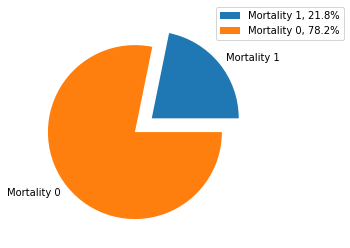

In [114]:
# General mortality in the data
y = np.array([mortality_1_count, mortality_0_count])
labels = ["Mortality 1", "Mortality 0"]
sizes = [mortality_1_count_percentage,mortality_0_count_percentage]
myexplode = [0.25, 0]


plt.pie(y, labels = labels, explode = myexplode)

labels = [f'{l}, {s:0.1f}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1.1), loc='upper left', labels=labels)

plt.show() 

In [115]:
# Show mortality based on age group

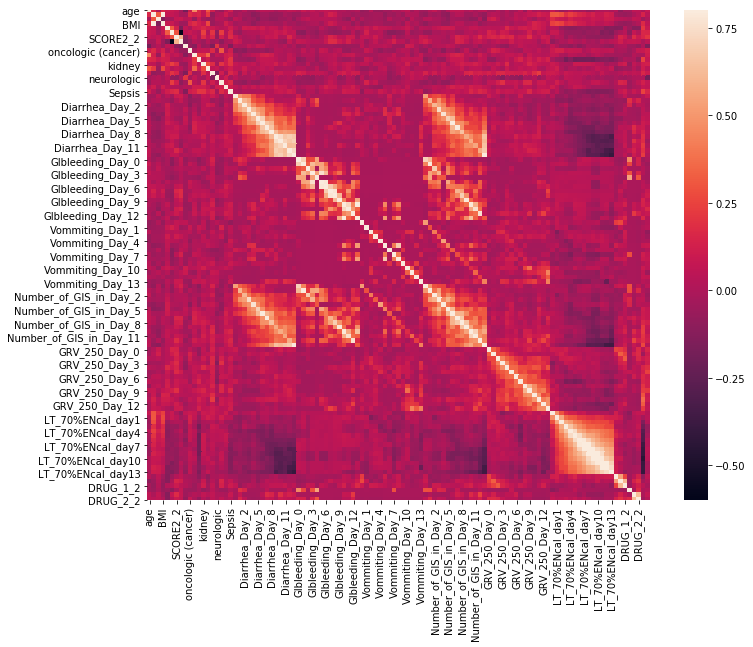

In [116]:
# Method of correlation:
# pearson : standard correlation coefficient
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

# Only Data from the first 3 days

## Data Cleaning

In [117]:
# Summing the occurence of symptoms for the first three days in the ICU
data['first_day_symptoms'] = data['Diarrhea_Day_0'] + data['GIbleeding_Day_0'] + data['Vommiting_Day_0']
data['second_day_symptoms'] = data['Diarrhea_Day_1'] + data['GIbleeding_Day_1'] + data['Vommiting_Day_1']
data['third_day_symptoms'] = data['Diarrhea_Day_2'] + data['GIbleeding_Day_2'] + data['Vommiting_Day_2']
data['summed_symptoms'] = data['first_day_symptoms'] + data['second_day_symptoms'] + data['third_day_symptoms']

#data['summedSymptoms']

In [118]:
# Remove all columns between the column names
three_days_data = data.drop(data.loc[:, 'Diarrhea_Day_3':'Diarrhea_Day_13'].columns, axis = 1)
three_days_data = three_days_data.drop(three_days_data.loc[:, 'GIbleeding_Day_3':'GIbleeding_Day_13'].columns, axis = 1)
three_days_data = three_days_data.drop(three_days_data.loc[:, 'Vommiting_Day_3':'Number_of_GIS_in_Day_13_cat'].columns, axis = 1)
three_days_data = three_days_data.drop(three_days_data.loc[:, 'GRV_250_Day_3':'GRV_250_Day_13'].columns, axis = 1)
three_days_data = three_days_data.drop(three_days_data.loc[:, 'LT_70%ENcal_day3':'LT_70%ENcal_day13'].columns, axis = 1)
#three_days_data

In [122]:
three_days_data.head()

,age,age_cat,gender,weight,height,BMI,BMI_cat,SCORE_1_0,SCORE2_0,SCORE2_2,...,DRUG_2_1,DRUG_2_2,ICU_LOS,LOS_Group,mortality,feeding_new,first_day_symptoms,second_day_symptoms,third_day_symptoms,summed_symptoms
0,72,70-79,F,65.0,1.65,23.875115,18.5-24.9,16,0.0,0.0,...,0.0,0.0,9,LOS_8-13,0,EN,0,0,2,2
1,58,50-59,M,101.0,1.75,32.979592,30+,23,9.0,7.0,...,0.0,0.0,5,LOS_5-7,0,EN,0,1,0,1
2,62,60-69,M,85.0,1.65,31.221304,30+,0,0.0,0.0,...,0.0,1.0,3,LOS_3-4,0,EN,0,0,0,0
3,65,60-69,M,75.0,1.70,25.951557,25-29.9,0,4.0,0.0,...,0.0,0.0,23,LOS_14_and_more,0,EN,0,0,0,0
4,71,70-79,F,48.0,1.58,19.227688,18.5-24.9,0,0.0,0.0,...,0.0,0.0,6,LOS_5-7,0,EN,0,0,0,0


In [120]:
full_feature_list = list(three_days_data.columns)
full_feature_list

['age',
 'age_cat',
 'gender',
 'weight',
 'height',
 'BMI',
 'BMI_cat',
 'SCORE_1_0',
 'SCORE2_0',
 'SCORE2_2',
 'Delta_SCORE2',
 'active_problem_cat',
 'trauma',
 'oncologic (cancer)',
 'cardio',
 'pulmonary',
 'kidney',
 'metabolic',
 'gastrointestinal',
 'neurologic',
 'hematologic',
 'vascular',
 'Sepsis',
 'Diarrhea_Day_0',
 'Diarrhea_Day_1',
 'Diarrhea_Day_2',
 'GIbleeding_Day_0',
 'GIbleeding_Day_1',
 'GIbleeding_Day_2',
 'Vommiting_Day_0',
 'Vommiting_Day_1',
 'Vommiting_Day_2',
 'GRV_250_Day_0',
 'GRV_250_Day_1',
 'GRV_250_Day_2',
 'LT_70%ENcal_day0',
 'LT_70%ENcal_day1',
 'LT_70%ENcal_day2',
 'DRUG_1_0',
 'DRUG_1_1',
 'DRUG_1_2',
 'DRUG_2_0',
 'DRUG_2_1',
 'DRUG_2_2',
 'ICU_LOS',
 'LOS_Group',
 'mortality',
 'feeding_new',
 'first_day_symptoms',
 'second_day_symptoms',
 'third_day_symptoms',
 'summed_symptoms']

In [121]:
## LOS_Group prediction by symptoms 